# Problem Set 4, due February 23 at 11:59am, mid-day, noon.

### Before You Start

This is a fun but challenging problem set. It will test your python skills, as well as your understanding of the material in class and in the readings. Start early and debug often! Some notes:

* Part 1 is meant to be easy, so get through it quickly.
* Part 2 (especially 2.1) will be difficult, but it is the lynchpin of this problem set to make sure to do it well and understand what you've done. If you find your gradient descent algorithm is taking more than a few minutes to complete, debug more, compare notes with others, and go to the TA sessions.
* Depending on how well you've done 2.1, parts 2.3 and 4.3 will be relatively painless or incredibly painful. 
* Part 4 (especially 3.3) will be computationally intensive. Don't leave this until the last minute, otherwise your code might be running when the deadline arrives.
* Do the extra credit problems last.

---

## Introduction to the assignment

As with the last assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).

In [226]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

%matplotlib inline  
import matplotlib.pyplot as plt  
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf


In [227]:
from sklearn.datasets import load_boston
bdata = load_boston()

---

## Part 1: Getting oriented

Use different learning rates

### 1.1 Use existing libraries

Soon, you will write your own gradient descent algorithm, which you will then use to minimize the squared error cost function.  First, however, let's use the canned versions that come with Python, to make sure we understand what we're aiming to achieve.

Using the same Boston housing prices dataset, use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn or the [OLS class](http://wiki.scipy.org/Cookbook/OLS) from SciPy to explore the relationship between  median housing price and number of rooms per house. Do this by first (a) regressing the housing price on the number of rooms per house, and then (b) regressing the housing price on the number of rooms per house and the (number of rooms per house) squared.  Interpret your results.

In [228]:
# uncomment the following if you want to see a lengthy description of the dataset
print bdata.keys()    
print bdata.feature_names
#print bdata.data.shape
 # print bdata.target.shape
#print bdata.DESCR

['data', 'feature_names', 'DESCR', 'target']
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [229]:
bdata_df = pd.DataFrame(bdata.data, columns=bdata.feature_names)
bdata_df['MEDV'] = bdata.target

room =np.array(bdata_df[["RM"]].dropna())
target = bdata_df.MEDV.dropna()

mod = smf.ols(formula='target ~ room', data=bdata_df)
res = mod.fit()
print res.summary() #show the regression summary   

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 22 Feb 2017   Prob (F-statistic):           2.49e-74
Time:                        16:44:31   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

In [230]:
model2 = smf.ols(formula = 'target ~ room + I(room**2)', data = bdata_df)
res2 = model2.fit()
print res2.summary() #show the regression summary  

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     305.4
Date:                Wed, 22 Feb 2017   Prob (F-statistic):           1.46e-87
Time:                        16:44:33   Log-Likelihood:                -1639.1
No. Observations:                 506   AIC:                             3284.
Df Residuals:                     503   BIC:                             3297.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       66.0588     12.104      5.458   

*Enter your observations here*

Analysis shows the intercept at 66.0588 and the beta arrays at -22.64 and 2.4701 respectively. 

### 1.2 Training and testing

Chances are, for the above problem you used all of your data to fit the regression line. In some circumstances this is a reasonable thing to do, but often this will result in overfitting. Let's redo the above results the ML way, using careful cross-validation.  Since you are now experts in cross-validation, and have written your own cross-validation algorithm from scratch, you can now take a shortcut and use the libraries that others have built for you.

Using the [cross-validation functions](http://scikit-learn.org/stable/modules/cross_validation.html) from scikit-learn, use 250-fold cross-validation to fit regression (a) above, i.e. the linear fit of housing price on number of rooms per house. Each fold of cross-validation will give you one slope coefficient and one intercept coefficient.  
Plot the distribution of the 250 slope coefficients using a histogram with 25 bins, then draw a vertical line at the value of the slope coefficient that you estimated in 1.1 using the full dataset.  What do you notice?

In [231]:
from sklearn.cross_validation import KFold
from sklearn import linear_model
from sklearn import svm
from sklearn.cross_validation import KFold, cross_val_predict,cross_val_score,train_test_split

bdata_df = pd.DataFrame(bdata.data, columns=bdata.feature_names)
bdata_df['MEDV'] = bdata.target

room =np.array(bdata_df[["RM"]].dropna())
target = np.array(bdata_df.MEDV.dropna())

room_train, room_test, target_train, target_test = train_test_split(room, target, test_size=0.34, random_state=100)

X = room_train
y = target_train

kf = KFold(len(X), n_folds=250, shuffle=True)
model = LinearRegression()
slopes = []

#iterate through folds
for train, test in kf:
    X_train, X_test = X[train], y[test]
    y_train = y[train]
    model.fit(X_train,y_train)
    slopes.append(model.coef_)

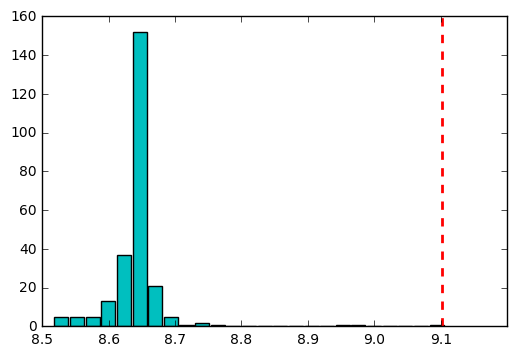

In [232]:
#draw a histogram
import matplotlib.pyplot as plt
import numpy as np

plt.axvline(res.params[1], color='r', linestyle='dashed', linewidth=2)
hist, bins = np.histogram(slopes, bins=25)
width = 0.9 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, color='c')
plt.show()

*Enter your observations here*

Analysis shows that the most of the data population is within 5.5 and 8.7 for the 250 cross validation fold. The slope found in 1.1 seems to be away from the main population. 

### 1.3 Regression lines

Create a scatterplot of housing price on rooms per house, and add the two regression lines from 1.1 (or 1.2 if you prefer to do so). Show the linear regression line in red, and the linear+quadratic regression line (which may have curvature) in blue.  Label these two regression lines with the corresponding regression equations (i.e. the slope and intercept of the line).

Bonus: Add the 95% confidence bands (i.e.,  the area that has a 95% chance of containing the true regression line) to each of these lines.

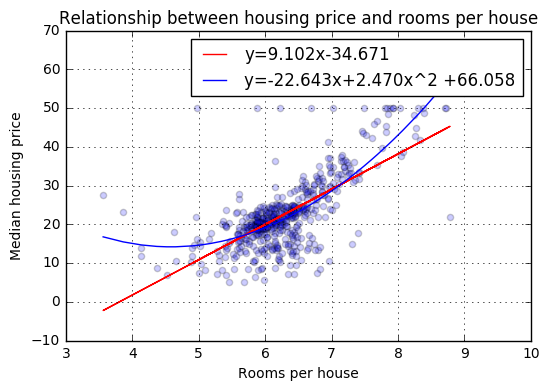

In [233]:
from pylab import title,  legend

room =np.array(bdata_df[["RM"]].dropna())
target = np.array(bdata_df.MEDV.dropna())

Y = target
X = room

plt.title('Relationship between housing price and rooms per house')
plt.xlabel('Rooms per house')
plt.ylabel('Median housing price')

plt.scatter(X, Y, alpha=0.2)

yfit = [res.params[0] + res.params[1] * xi for xi in X]

plt.plot(X, yfit, color='red')

X = np.sort(np.array(list(X.flat)))
regression = np.polyfit(X, Y, 2)
yfit2 = [res2.params[0] + res2.params[1] * xi + res2.params[2]*xi**2 for xi in X]
plt.plot(X, yfit2, color='blue')

legend(['y=9.102x-34.671','y=-22.643x+2.470x^2 +66.058'])

plt.grid()
plt.show()


## Part 2: Gradient descent: Linear Regression

This is where it gets fun!

### 2.1 Implement gradient descent with one independent variable (Average rooms per house)

Implement the batch gradient descent algorithm that we discussed in class. Use the version you implement to regress the housing price on the number of rooms per house. Experiment with 3-4 different values of the learning rate *R*, and do the following:

* Report the values of alpha and beta that minimize the loss function
* Report the number of iterations it takes for your algorithm to converge (for each value of *R*)
* Report the total running time of your algorithm, in seconds

Some skeleton code is provided below, but you should feel free to delete this code and start from scratch if you prefer.

* *Hint 1: Don't forget to implement a stopping condition, so that at every iteration you check whether your results have converged. Common approaches to this are to (a) check to see if the loss has stopped decreasing; and (b) check if both your current parameter esimates are close to the estimates from the previous iteration.  In both cases, "close" should not be ==0, it should be <=epsilon, where epsilon is something very small (like 0.0001).*
* *Hint 2: Some people like to include a MaxIterations parameter in their gradient descent algorithm, to prevent divergence. *

In [234]:
import time

"""
Function
--------
bivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalues, yvalues : narray
    xvalues: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta: float
    co-efficient
"""
def bivariate_ols(xvalues, yvalues, R=0.01, MaxIterations=1000):
    start_time = time.time()
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    for i in range(MaxIterations):
        intercept, slope = gradient_descent_helper(xvalues, yvalues,initial_b,initial_m, R)
        if i % 1000 == 0:
            print "With learning rate:{0} after {1} iterations alpha = {2}, beta = {3}. Time taken {4} seconds".format(R, i, intercept,slope, str(round(time.time() - start_time,2)))
    
    return intercept, slope        
     
     
def gradient_descent_helper(xvalues, yvalues, b_current, m_current, learning_rate):
    
    # y = mx + b
    # m is slope, b is y-intercept
    b_gradient = 0
    m_gradient = 0
    N = float(len(xvalues)) #size of the array
    for i in range(0, len(xvalues)): #iterate through the size of the training data 
        x = xvalues[i, 0] # getting the training data 
        y = yvalues[i]   #getting the target
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current)) # derivative for the intercept
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current)) # derivative for the slope
    new_b = b_current - (learning_rate * b_gradient) # getting the final intercept
    new_m = m_current - (learning_rate * m_gradient) # getting the final slope
    
    return [new_b, new_m]    
    


In [235]:
# Testing the bivariate with one feature

X =np.array(bdata_df[["RM"]].dropna()) #getting the room feature 
Y = np.array(bdata_df.MEDV.dropna()) #getting the target data 

learning_rate = [0.001, 0.01, 0.1,0.0001] # using different learning rates 
for lr in learning_rate: #iterate through the learning rate and calculate the slope and intercept for each
    bivariate_ols(X, Y, lr, 10000)
    print 

With learning rate:0.001 after 0 iterations alpha = 0.0450656126482, beta = 0.29219003004. Time taken 0.0 seconds
With learning rate:0.001 after 1000 iterations alpha = 0.0450656126482, beta = 0.29219003004. Time taken 1.21 seconds
With learning rate:0.001 after 2000 iterations alpha = 0.0450656126482, beta = 0.29219003004. Time taken 2.52 seconds
With learning rate:0.001 after 3000 iterations alpha = 0.0450656126482, beta = 0.29219003004. Time taken 3.75 seconds
With learning rate:0.001 after 4000 iterations alpha = 0.0450656126482, beta = 0.29219003004. Time taken 4.89 seconds
With learning rate:0.001 after 5000 iterations alpha = 0.0450656126482, beta = 0.29219003004. Time taken 6.05 seconds
With learning rate:0.001 after 6000 iterations alpha = 0.0450656126482, beta = 0.29219003004. Time taken 7.19 seconds
With learning rate:0.001 after 7000 iterations alpha = 0.0450656126482, beta = 0.29219003004. Time taken 8.3 seconds
With learning rate:0.001 after 8000 iterations alpha = 0.0450

*Enter your observations here*

The Analysis shows the followings:
   - learning rate of 0.001 the intercept is at 0.0450656126482 and the slope is at 0.29219003004. 
   - learning rate of 0.01 the intercept is at 0.450656126482 and the slope is at 2.9219003004
   - learning rate of 0.1 the intercept is at  4.50656126482 and the slope is at 29.219003004
   - learning rate of 0.0001 the intercept is at  0.00450656126482 and the slope is at 0.029219003004
The running time is almost identical for all of the iterations except that it took 0.40 seconds longer at learning rate of 0.001 to complete 10000 iterations.  

### 2.2 Data normalization (done for you!)

Soon, you will implement a version of gradient descent that can use an arbitrary number of independent variables. Before doing this, we want to give you some code in case you want to standardize your features.

In [236]:
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

### 2.3 Implement gradient descent with an arbitrary number of independent variables

Now that you have a simple version of gradient descent working, create a version of gradient descent that can take more than one independent variable.  Assume all independent variables will be continuous.  Test your algorithm using CRIM and RM as independent variables. Standardize these variables before before inputting them to the gradient descent algorithm. 

As before,  report and interpret your estimated coefficients, the number of iterations before convergence, and the total running time of your algorithm. Experiment with 2-3 different values of R.

* *Hint 1: Be careful to implement this efficiently, otherwise it might take a long time for your code to run. Commands like `np.dot` can be a good friend to you on this problem*

In [237]:
import time
"""
Function
--------
multivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    co-efficient
"""
def multivariate_ols(xvalues, yvalues, R=0.01, MaxIterations=1000):
    start_time = time.time()
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    initial_m2 = 0 # intial x^2 guess 
  
    for i in range(MaxIterations):
        intercept, slope,  beta2 = multivariate_helper(xvalues, yvalues,initial_b,initial_m, initial_m2, R)
        if i % 1000 == 0:
            print "With rate:{0} after {1} iterations alpha = {2}, beta = {3}, beta2 = {4}. Time taken {5} seconds".format(R, i, intercept,slope, beta2, str(round(time.time() - start_time,2)))
            
    print 
    return intercept, slope, beta2

def multivariate_helper(xvalues, yvalues, b_current, m_current, m2_current, learning_rate):
    # create a multivariate up to x^2 which means that the beta array will have two coefficients 
    b_gradient = 0
    m_gradient = 0
    m2_gradient = 0
    N = float(len(xvalues)) #getting the size of the training data
    for i in range(0, len(xvalues)):
        x = xvalues[i, 0]
        y = yvalues[i]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current)) # derivative for the intercept
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current)) # derivative for the slope
        m2_gradient += -(2/N)*x**2 * (y - ((m_current * x) +b_current)) # derivative for x^2
    new_b = b_current - (learning_rate * b_gradient) # getting the final intercept
    new_m = m_current - (learning_rate * m_gradient) # getting the final slope
    new_m2 = m_current - (learning_rate * m2_gradient)  # getting the final x^2 value      
    return [new_b, new_m, new_m2] 
 


In [238]:
# Testing the multivariate with two features

X  = np.array(bdata_df[["CRIM", "RM"]].dropna()) #getting crime and room features
X  = np.asmatrix(X)
Y  = np.array(bdata_df.MEDV.dropna()) #getting the target data 

X = standardize(X) #standardize the training data 

MaxIterations = 10000
learning_rate = [0.1, 0.01, 0.001] # using different learning rates
for lr in learning_rate:  #looping through the different learning rates
    multivariate_ols(X, Y, lr, MaxIterations)
    print


With rate:0.1 after 0 iterations alpha = 4.50656126482, beta = -0.709005204238, beta2 = 2.31090470632. Time taken 0.0 seconds
With rate:0.1 after 1000 iterations alpha = 4.50656126482, beta = -0.709005204238, beta2 = 2.31090470632. Time taken 2.52 seconds
With rate:0.1 after 2000 iterations alpha = 4.50656126482, beta = -0.709005204238, beta2 = 2.31090470632. Time taken 5.44 seconds
With rate:0.1 after 3000 iterations alpha = 4.50656126482, beta = -0.709005204238, beta2 = 2.31090470632. Time taken 7.92 seconds
With rate:0.1 after 4000 iterations alpha = 4.50656126482, beta = -0.709005204238, beta2 = 2.31090470632. Time taken 10.34 seconds
With rate:0.1 after 5000 iterations alpha = 4.50656126482, beta = -0.709005204238, beta2 = 2.31090470632. Time taken 12.81 seconds
With rate:0.1 after 6000 iterations alpha = 4.50656126482, beta = -0.709005204238, beta2 = 2.31090470632. Time taken 15.33 seconds
With rate:0.1 after 7000 iterations alpha = 4.50656126482, beta = -0.709005204238, beta2 = 

The Analysis shows the followings:
   - learning rate of 0.1 the intercept is at 4.50656126482, slope at -0.709005204238, and x^2 at 2.31090470632 
   - learning rate of 0.01 the intercept is at 0.450656126482, slope at -0.0709005204238, and x^2 at 0.231090470632. 
   - learning rate of 0.001 the intercept is at 0.0450656126482, slope is at -0.00709005204238 , and x^2 at 0.0231090470632
The running time varies for all of the iterations. However, it took over 2 seconds longer at learning rate of 0.01 to complete 10000 iterations.  

### 2.4 Compare standardized vs. non-standardized results

Repeat the analysis from 2.3, but this time do not standardize your variables - i.e., use the original data. Use the same three values of R (0.1, 0.01, and 0.001). What do you notice about the running time and convergence properties of your algorithm?

In [239]:
# Testing the multivariate with two features 
X  = np.array(bdata_df[["CRIM", "RM"]].dropna())
X  = np.asmatrix(X)
Y  = np.array(bdata_df.MEDV.dropna())

#non standardize training data 
MaxIterations = 10000
learning_rate = [0.1, 0.01, 0.001]
for lr in learning_rate: 
    multivariate_ols(X, Y, lr, MaxIterations) #run multivarriate 
    print 

With rate:0.1 after 0 iterations alpha = 4.50656126482, beta = 10.1063650866, beta2 = 184.886082746. Time taken 0.0 seconds
With rate:0.1 after 1000 iterations alpha = 4.50656126482, beta = 10.1063650866, beta2 = 184.886082746. Time taken 2.48 seconds
With rate:0.1 after 2000 iterations alpha = 4.50656126482, beta = 10.1063650866, beta2 = 184.886082746. Time taken 5.54 seconds
With rate:0.1 after 3000 iterations alpha = 4.50656126482, beta = 10.1063650866, beta2 = 184.886082746. Time taken 8.08 seconds
With rate:0.1 after 4000 iterations alpha = 4.50656126482, beta = 10.1063650866, beta2 = 184.886082746. Time taken 10.54 seconds
With rate:0.1 after 5000 iterations alpha = 4.50656126482, beta = 10.1063650866, beta2 = 184.886082746. Time taken 13.03 seconds
With rate:0.1 after 6000 iterations alpha = 4.50656126482, beta = 10.1063650866, beta2 = 184.886082746. Time taken 15.55 seconds
With rate:0.1 after 7000 iterations alpha = 4.50656126482, beta = 10.1063650866, beta2 = 184.886082746. T

*Enter your observations here*

The non-standardize shows larger coefficients values or bigger slope and beta arrays when comparing to the standardize models. In other words, there is a steeper slope in the non-standarize model which corresponds to a bigger gradient values in this model as opposed to the standardize model. 

As far as run-time of execution, it varies between the two models. However, we notice that it took 6 seconds more to run the non-standardize model at 0.001 when compared to the same iteration for the standardize model. 

## 3. Prediction

Let's use our fitted model to make predictions about housing prices. Since the focus is now on prediction rather than the interpretation of the coefficients, it would be wise for you to first standardize your features before proceeding.

### 3.1 Cross-Validation

Unless you were careful above, you probably overfit your data again. Let's fix that in one of two ways. If you're feeling confident, use k-fold cross-validation to re-fit the multivariate regression from 2.3 above, and report your estimated coefficients (there should be three, corresponding to the intercept and the two coefficients for CRIM and RM). Or if you want to do the quick and dirty version, randomly divide your data into a training set (66%) and testing set (34%) and use the training set to re-fit the regression from 2.3 above. 

In [240]:
#creating a seed to allow for the same data to be generated
np.random.seed(seed=13579)

from sklearn.model_selection import train_test_split

X = pd.DataFrame(bdata.data, columns=bdata.feature_names)
bdata_df['MEDV'] = bdata.target
y = bdata_df['MEDV'].dropna()

#split the data in training and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=42)

#generate training set for Crime and Room
trainingSet =np.array(X_train[["CRIM", "RM"]].dropna())
trainingSet  = np.asmatrix(trainingSet)
trainingSet = standardize(trainingSet)

target = np.array(y)

#calculate multivariate for a train set of 66% 
MaxIterations = 10000
learning_rate = 0.01
intercept, beta1, beta2 = multivariate_ols(trainingSet, target, learning_rate, MaxIterations)


With rate:0.01 after 0 iterations alpha = 0.504540540541, beta = -0.0107032764963, beta2 = 0.451499117962. Time taken 0.0 seconds
With rate:0.01 after 1000 iterations alpha = 0.504540540541, beta = -0.0107032764963, beta2 = 0.451499117962. Time taken 1.89 seconds
With rate:0.01 after 2000 iterations alpha = 0.504540540541, beta = -0.0107032764963, beta2 = 0.451499117962. Time taken 3.59 seconds
With rate:0.01 after 3000 iterations alpha = 0.504540540541, beta = -0.0107032764963, beta2 = 0.451499117962. Time taken 5.2 seconds
With rate:0.01 after 4000 iterations alpha = 0.504540540541, beta = -0.0107032764963, beta2 = 0.451499117962. Time taken 6.83 seconds
With rate:0.01 after 5000 iterations alpha = 0.504540540541, beta = -0.0107032764963, beta2 = 0.451499117962. Time taken 8.59 seconds
With rate:0.01 after 6000 iterations alpha = 0.504540540541, beta = -0.0107032764963, beta2 = 0.451499117962. Time taken 10.35 seconds
With rate:0.01 after 7000 iterations alpha = 0.504540540541, beta 

*Discuss your results here*

The analysis shows that at learning rate of 0.01 the intercept is at 0.504540540541, slope at -0.0107032764963, and second beta value at 0.451499117962

### 3.2 Predicted values and RMSE

Let's figure out how accurate this predictive model turned out to be. Compute the RMSE on your test cases, i.e. take the model parameters that you found above and compare the actual to the predicted values for just the test instances. If you did this the k-fold way above, this will be the average RMSE across the k test sets. If you did this the quick and dirty way above, this will just be the RMSE on your single test set.

What is your test RMSE?  How does it compare to the performance of your nearest neighbor algorithm from the last problem set?

In [241]:
# Your code here
from sklearn.metrics import mean_squared_error
def compute_rmse(predictions, yvalues):
    # taking the square root of the mean squared error 
    rmse = np.sqrt(mean_squared_error(predictions,yvalues))
    return rmse

#create a beta array of both beta coefficients 
beta_array = np.array([beta1, beta2])

X_test = np.array(bdata_df[["CRIM", "RM"]].dropna())
y = bdata_df['MEDV'].dropna()

#calculate the preditions using the coefficients and the intercept
predictions = np.dot(X_test, beta_array) + intercept

#compute the rmse against the target data
rmse = compute_rmse(predictions, y)
print rmse

21.2038444036


*Discuss your results here*

Analysis shows that at best the responses or coefficients vary around our target predicions by 21.20. 

### Extra Credit 1: Logistic Regression

For extra credit, implement logistic regression using gradient descent. Create a new variable (EXPENSIVE) to indicate whether the median housing price is more than $400,000. Use your model  a logistic regression of EXPENSIVE on CHAS and RM. Report your results.

In [ ]:
# Your code here

*Discuss your results here*

## 4 Regularization 

### 4.1 Get prepped

Step 1: Create new interaction variables between each possible pair of the F_s features. If you originally had *K* features, you should now have *K+K^2/2* features. Standardize all of your features.

Step 2: For simplicity, generate a single training and testing set.  Randomly sample 66% of your data and call this the training set, and set aside the remaining 34% as your test set.

In [243]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
#create the data sets
X = pd.DataFrame(bdata.data, columns=bdata.feature_names)

#create the target set
y = bdata_df['MEDV'] = bdata.target


#split between training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=42)

#create a polynomial set of features with interaction_only = ture
poly_features = PolynomialFeatures(interaction_only=True)
poly_features.fit(X_train) # fit the poly features
x_train_poly = poly_features.transform(X_train) # set training data into the poly features



### 4.2 Let's overfit!
Now, using your version of multivariate regression from 2.3, let's overfit the training data. Using your training set, regress housing price on as many of those *K+K/2* features as you can.  If you get too greedy, it's possible this will take a long time to compute, so start with 5-10 features, and if you have the time, add more features.

Report the RMSE when you apply your model to your training set and to your testing set. How do these numbers compare to each other, and to the RMSE from 3.2 and nearest neighbors?

In [244]:
#execute the multivariate for the poly features 
MaxIterations = 10000
learning_rate = 0.01
intercept, beta1, beta2 = multivariate_ols(x_train_poly, target, learning_rate, MaxIterations)


With rate:0.01 after 0 iterations alpha = 0.504540540541, beta = 0.504540540541, beta2 = 0.504540540541. Time taken 0.0 seconds
With rate:0.01 after 1000 iterations alpha = 0.504540540541, beta = 0.504540540541, beta2 = 0.504540540541. Time taken 1.17 seconds
With rate:0.01 after 2000 iterations alpha = 0.504540540541, beta = 0.504540540541, beta2 = 0.504540540541. Time taken 2.33 seconds
With rate:0.01 after 3000 iterations alpha = 0.504540540541, beta = 0.504540540541, beta2 = 0.504540540541. Time taken 3.83 seconds
With rate:0.01 after 4000 iterations alpha = 0.504540540541, beta = 0.504540540541, beta2 = 0.504540540541. Time taken 4.98 seconds
With rate:0.01 after 5000 iterations alpha = 0.504540540541, beta = 0.504540540541, beta2 = 0.504540540541. Time taken 6.47 seconds
With rate:0.01 after 6000 iterations alpha = 0.504540540541, beta = 0.504540540541, beta2 = 0.504540540541. Time taken 7.61 seconds
With rate:0.01 after 7000 iterations alpha = 0.504540540541, beta = 0.5045405405

In [245]:
#set the beta arrays 
beta_array = np.array([beta1, beta2])

#create data set for CRIME and Room 
X_test = np.array(bdata_df[["CRIM", "RM"]].dropna())
#create the data set
y = bdata_df['MEDV'].dropna()

#generate the predictions
predictions = np.dot(X_test, beta_array) + intercept
rmse = compute_rmse(predictions, y)
print rmse

20.4779923419


*Discuss your results here*

Analysis shows that the RMSE is slightly better at 20.47 when using a polymialfeatures where the interaction_only is activate.   In the previous experiment (3.2 the RMSE  was around 21.20. We notice with thisexperiment using the polynomialfeatures and interaction_only active, the RMSE decreases by 0.73. A better improvment in our model. If the degrees of features were to be increased, we expect that the RMSE would have been hire than was was reported in experiment 3.2. 

### 4.3 Ridge regularization
Incorporate L2 (Ridge) regularization into your multivariate_ols regression. Write a new version of your gradient descent algorithm that includes a regularization term "lambda" to penalize excessive complexity. 

Use your regularized regression to re-fit the model from 3.2 above on your training data. Try this for several different values of lambda, and report your RMSE for each lambda separately for your training and testing data. How do these numbers compare to each other, to the RMSE from 4.2,  to the RMSE from 2.3, and to the RMSE from nearest neighbors?

Go brag to your friends about how you just implemented ridge-regularized multivariate regression using gradient descent optimization, from scratch. If you still have friends.

In [246]:

import time
"""
Function
--------
multivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    co-efficient
"""

def multivariate_Ridge_ols(xvalues, yvalues, R=0.01, MaxIterations=1000, lambda2=1):
    
    start_time = time.time()
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    initial_m2 = 0 # intial x^2 guess 
    
    for i in range(MaxIterations):
        intercept, slope,  beta2 = multivariate_Ridge_helper(xvalues, yvalues,initial_b,initial_m, R, lambda2)
        if i % 1000 == 0:
            print "With rate:{0} after {1} iterations alpha = {2}, beta = {3}, beta2 = {4}. Time taken {5} seconds".format(R, i, intercept,slope, beta2, str(round(time.time() - start_time,2)))
            
    print 
    return intercept, slope, beta2

def multivariate_Ridge_helper(xvalues, yvalues, b_current, m_current, learning_rate, lambda2):
    
    b_gradient = 0
    m_gradient = 0
    m2_gradient = 0
    N = float(len(xvalues))
    for i in range(0, len(xvalues)):
        x = xvalues[i, 0]
        y = yvalues[i]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current)) 
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current)) 
        m2_gradient += -(2/N)*x**2 * (y - ((m_current * x) +b_current)) 
    new_b = b_current - (learning_rate * b_gradient) + lambda2 * b_current #added lambda to the current intercept 
    new_m = m_current - (learning_rate * m_gradient) + lambda2 * m_current  #added lambda to the current coefficent
    new_m2 = m_current - (learning_rate * m2_gradient) + lambda2 * m_current #added lamdda to the second current coefficient
    
    return [new_b, new_m, new_m2]

In [247]:

from sklearn.model_selection import train_test_split

#Set data sets 
X = pd.DataFrame(bdata.data, columns=bdata.feature_names)
bdata_df['MEDV'] = bdata.target
y = bdata_df['MEDV'].dropna()

#create a training and testing set 66% and 34% respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=42)

#create a training set with CRIME and ROOM data sets
trainingSet =np.array(X_train[["CRIM", "RM"]].dropna())
trainingSet  = np.asmatrix(trainingSet)
trainingSet = standardize(trainingSet)

#generate the target data set 
target = target - np.mean(target, axis=0)

MaxIterations = 10000
learning_rate = 0.01
lambda2 = 1

#calculate the multivariate ridge for lambda = 1
interceptRidge, beta1Ridge, beta2Ridge = multivariate_Ridge_ols(trainingSet, target, learning_rate, MaxIterations, lambda2)


With rate:0.01 after 0 iterations alpha = 0.0538844140583, beta = -0.0107032764963, beta2 = 0.000842991479981. Time taken 0.0 seconds
With rate:0.01 after 1000 iterations alpha = 0.0538844140583, beta = -0.0107032764963, beta2 = 0.000842991479981. Time taken 2.08 seconds
With rate:0.01 after 2000 iterations alpha = 0.0538844140583, beta = -0.0107032764963, beta2 = 0.000842991479981. Time taken 3.74 seconds
With rate:0.01 after 3000 iterations alpha = 0.0538844140583, beta = -0.0107032764963, beta2 = 0.000842991479981. Time taken 5.4 seconds
With rate:0.01 after 4000 iterations alpha = 0.0538844140583, beta = -0.0107032764963, beta2 = 0.000842991479981. Time taken 7.05 seconds
With rate:0.01 after 5000 iterations alpha = 0.0538844140583, beta = -0.0107032764963, beta2 = 0.000842991479981. Time taken 8.71 seconds
With rate:0.01 after 6000 iterations alpha = 0.0538844140583, beta = -0.0107032764963, beta2 = 0.000842991479981. Time taken 10.34 seconds
With rate:0.01 after 7000 iterations a

*Discuss your results here*

Analysis shows that when using the L2 ridge, slope is at  0.0538844140583 and the beta arrays are at -0.0107032764963 and 0.000842991479982

In [248]:
#create the beta arrays
beta_array = np.array([beta1Ridge, beta2Ridge])

#generate the data sets
X_test = np.array(bdata_df[["CRIM", "RM"]].dropna())
y = bdata_df['MEDV'].dropna()

#create the prediction data
predictions = np.dot(X_test, beta_array) + interceptRidge

#compute the RMSE
rmse = compute_rmse(predictions, y)
print rmse

24.3014996376


In [249]:
#calculate the multivariate ridge for lambda = 2
MaxIterations = 10000
learning_rate = 0.01
lambda2 = 2
interceptRidge2, beta1Ridge2, beta2Ridge2 = multivariate_Ridge_ols(trainingSet, target, learning_rate, MaxIterations, lambda2)


With rate:0.01 after 0 iterations alpha = 0.0538844140583, beta = -0.0107032764963, beta2 = 0.000842991479981. Time taken 0.0 seconds
With rate:0.01 after 1000 iterations alpha = 0.0538844140583, beta = -0.0107032764963, beta2 = 0.000842991479981. Time taken 2.03 seconds
With rate:0.01 after 2000 iterations alpha = 0.0538844140583, beta = -0.0107032764963, beta2 = 0.000842991479981. Time taken 3.75 seconds
With rate:0.01 after 3000 iterations alpha = 0.0538844140583, beta = -0.0107032764963, beta2 = 0.000842991479981. Time taken 5.71 seconds
With rate:0.01 after 4000 iterations alpha = 0.0538844140583, beta = -0.0107032764963, beta2 = 0.000842991479981. Time taken 7.72 seconds
With rate:0.01 after 5000 iterations alpha = 0.0538844140583, beta = -0.0107032764963, beta2 = 0.000842991479981. Time taken 9.35 seconds
With rate:0.01 after 6000 iterations alpha = 0.0538844140583, beta = -0.0107032764963, beta2 = 0.000842991479981. Time taken 10.97 seconds
With rate:0.01 after 7000 iterations 

Analysis shows that the RMSE for the L2 regularization is at 24.30. In previous experiments (3.2) the RMSE  was around 21.20. And in (4.2) it was at 20.47. This increases in the experiment is expected because of the addition of the lambad in the gradient calculation causes the RMSE to increase. 

In [250]:
 #set the beta arrays 
beta_array = np.array([beta1Ridge, beta2Ridge])

#set the data sets 
X_test = np.array(bdata_df[["CRIM", "RM"]].dropna())
y = bdata_df['MEDV'].dropna()

#calculate the predictions 
predictions = np.dot(X_test, beta_array) + interceptRidge

#generate the rmse 
rmse = compute_rmse(predictions, y)
print rmse

24.3014996376


Analysis shows that the RMSE tends to be uniform as the lambda changes. It appears that the model will not have a better RMSE beyond the 24.30 reported for different values of lambda

### Extra Credit 2: Cross-validate lambda

Use k-fold cross-validation to select the optimal value of lambda. Report the average RMSE across all training sets, and the average RMSE across all testing sets. How do these numbers compare to each other, to the RMSE from your previous efforts?  Finally, create a scatter plot that shows RMSE as a function of lambda.

*Discuss your results here*

### (Showoff) Extra Credit 3: Lambda and coefficients

If you're feeling extra-special, create a parameter plot that shows how the different coefficient estimates change as a function of lambda. To make this graph intelligible, only include the *K* original F_s features in this plot

In [ ]:
# Your code here

*Discuss your results here*